## Cleaning and Manipulate Dataset

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('Clean_Dataset.csv')
df.sample(20)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
204811,204811,Indigo,6E-588,Chennai,Evening,one,Night,Hyderabad,Economy,4.42,28,5735
133832,133832,Air_India,AI-402,Kolkata,Morning,one,Night,Mumbai,Economy,11.75,39,6048
123332,123332,SpiceJet,SG-4031,Kolkata,Evening,one,Evening,Delhi,Economy,24.67,25,5436
189881,189881,Air_India,AI-430,Chennai,Morning,one,Night,Mumbai,Economy,12.25,20,4672
244198,244198,Vistara,UK-940,Mumbai,Evening,one,Morning,Chennai,Business,14.17,39,64173
169440,169440,Vistara,UK-898,Hyderabad,Early_Morning,zero,Morning,Bangalore,Economy,1.17,39,1776
282174,282174,Vistara,UK-870,Hyderabad,Night,one,Evening,Bangalore,Business,20.42,35,56702
24990,24990,Air_India,AI-636,Delhi,Afternoon,one,Night,Kolkata,Economy,9.17,29,5805
273751,273751,Air_India,AI-770,Kolkata,Night,one,Evening,Chennai,Business,22.50,27,55983
8499,8499,Vistara,UK-801,Delhi,Morning,one,Night,Mumbai,Economy,11.17,42,6296


In [3]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [4]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [5]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [6]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [7]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [8]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [9]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [10]:
df['duration'].min()

0.83

In [11]:
df['duration'].max()

49.83

In [12]:
df['duration'].median()

11.25

In [13]:
print("Columns before dropping 'Unnamed: 0':", df.columns)

Columns before dropping 'Unnamed: 0': Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')


In [14]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

# df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)
df['class'] = df['class'].str.strip().apply(lambda x: 1 if x.lower() == 'business' else 0)

In [15]:
df.stops = pd.factorize(df.stops)[0]

In [16]:
df = df.join(pd.get_dummies(df.airline, prefix='airline', dtype=int)).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source', dtype=int)).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest', dtype=int)).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival', dtype=int)).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure', dtype=int)).drop('departure_time', axis=1)

In [17]:
df.sample(10)

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
277189,1,1,7.75,48,54115,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
157647,0,0,2.33,43,2276,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
298460,1,1,6.58,12,63441,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
161531,1,0,11.67,23,4660,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
51745,1,0,12.50,44,6122,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
297430,1,1,22.83,35,55377,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
191660,0,0,1.92,33,3000,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
185272,1,0,8.08,35,4541,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3919,1,0,8.25,21,5227,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
264085,2,1,25.25,4,59254,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Training Regression Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('price', axis=1), df.price

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
reg = RandomForestRegressor(n_jobs=-1)

reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [21]:
reg.score(X_test, y_test)

0.9854284431065893

In [22]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9854284431065893
MAE: 1065.4442286973158
MSE: 7472463.2548735645
RMSE: 2733.580665514293


Text(0.5, 1.0, 'Predicted vs Actual Price')

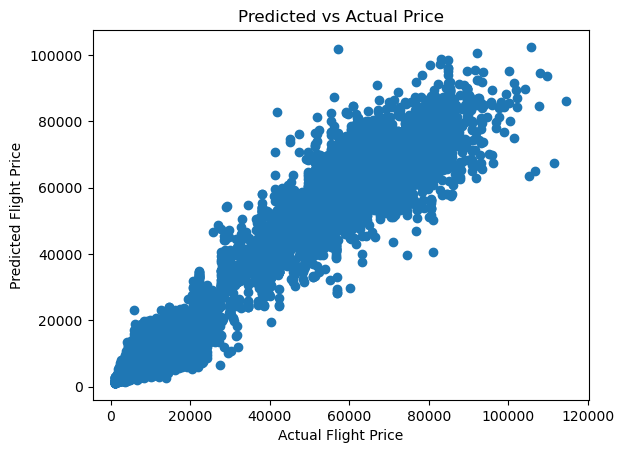

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Predicted vs Actual Price')

In [24]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [25]:
# important_features_dict = {}
# for idx, val in enumerate(reg.feature_importances_):
#     important_features_dict[idx] = val

# important_features_list = sorted(important_features_dict,
#                                  key=important_features_dict.get,
#                                  reverse=True)

# print(f'5 most important features: {important_features_list[:5]}')

importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

[('class', 0.8796715062415666),
 ('duration', 0.05746545612381017),
 ('days_left', 0.018660736380516105),
 ('airline_Air_India', 0.005633583019883178),
 ('airline_Vistara', 0.004399134379333302),
 ('source_Delhi', 0.003715274242882495),
 ('dest_Delhi', 0.003462812042033644),
 ('source_Mumbai', 0.0022019902220460487),
 ('dest_Mumbai', 0.0019133366505909189),
 ('stops', 0.0018825496685712384),
 ('dest_Kolkata', 0.0018093910365823839),
 ('source_Kolkata', 0.0017188915233609266),
 ('dest_Hyderabad', 0.0015495675956555867),
 ('arrival_Evening', 0.0014765078687300859),
 ('source_Hyderabad', 0.0012785091902824696),
 ('dest_Bangalore', 0.001178612203943462),
 ('arrival_Night', 0.001173503739564809),
 ('departure_Evening', 0.0011450207603686477),
 ('source_Bangalore', 0.0011350347633097913),
 ('arrival_Afternoon', 0.0009889810917468643),
 ('source_Chennai', 0.000973910550265546),
 ('departure_Morning', 0.0009067171920053683),
 ('dest_Chennai', 0.0008801907490252262),
 ('departure_Afternoon', 0.

<BarContainer object of 10 artists>

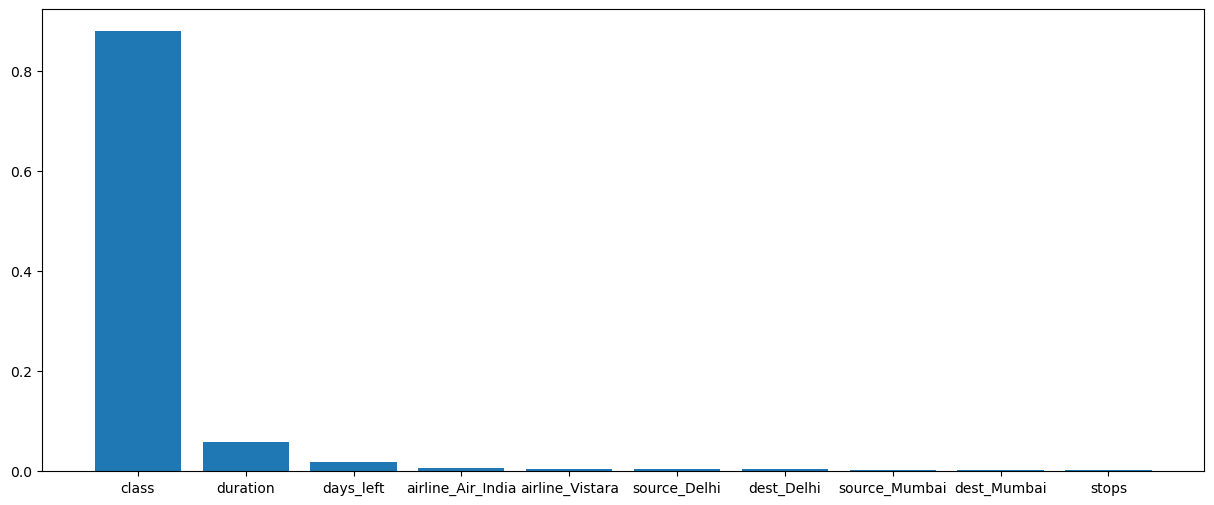

In [26]:
plt.figure(figsize=(15, 6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Corrected parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the RandomForestRegressor
model = RandomForestRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit to the data (assuming X_train and y_train are defined)
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# print("Best Parameters:", best_params)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=

KeyboardInterrupt: 

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 'auto', 'sqrt']
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3,
                                   scoring='neg_mean_absolute_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)
best_regressor = random_search.best_estimator_


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   0.0s
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time=  32.9s
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time=  33.0s
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time=  33.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-package

In [32]:
best_regressor.score(X_test, y_test)

0.9939164383163472

In [34]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9939164383163472
MAE: 807.184045835531
MSE: 3119720.9380151276
RMSE: 1766.2731776299859


Text(0.5, 1.0, 'Predicted vs Actual Price')

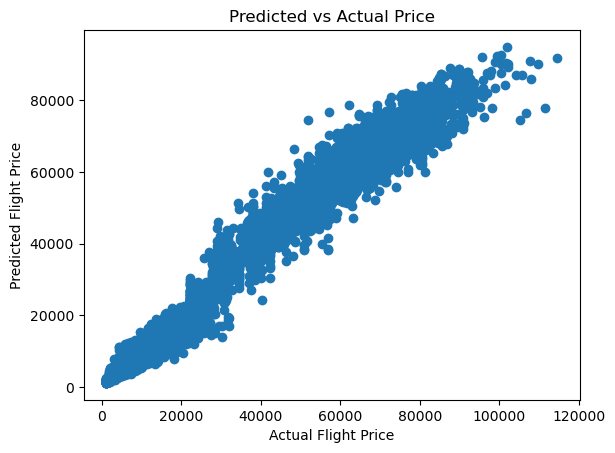

In [35]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Predicted vs Actual Price')